## Домашнее задание "Проблема качества данных"

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

Имеются данные по покупкам посетителей кофейни определенного вида кофе. Использую систему лояльности мы получили данные о размере дохода посетителей, их возраст. В датасете также имеется информация о количесте приобетенного товара, его цене. Попытаемся построить зависимость частоты покупок от дохода покупателей.

In [24]:
n = 10000
age = np.random.choice(60, n) + 20
price = np.random.choice(1000, n) + 200
quantity = np.random.choice(29, n) + 1

salary = price*quantity*10 + np.random.normal()*1000

data = pd.DataFrame({'age': age, 'price': price, 'quantity': quantity, 'salary': salary})
data.head(5)

,age,price,quantity,salary
0,20,1082,2,23532.632762
1,27,309,4,14252.632762
2,34,1065,13,140342.632762
3,46,978,7,70352.632762
4,58,347,10,36592.632762


Если посмотреть на зависимости признаков и целевой переменной, то они отличаются не только по характеру распределения, но и не совсем могут быть отнесены к линейной зависимости и при увеличении значений признака ошибка будет значительно расти.

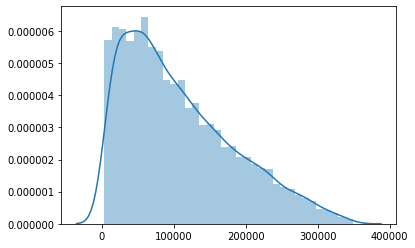

In [25]:
sns.distplot(data[['salary']])

In [26]:
data['salary'].median()

90297.63276170539

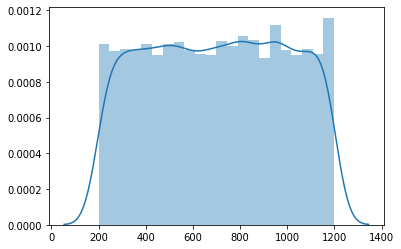

In [27]:
sns.distplot(data[['price']])

Построим модель на основе всех признаков

In [28]:
X = data[['age', 'quantity', 'price']]
y = data['salary']
model_all = LinearRegression()
model_all.fit(X, y)
print(f'Coef: {model_all.coef_}')
print(f'Intercept: {model_all.intercept_}')

prediction = model_all.predict(X)
print(f'MAE: {mean_absolute_error(prediction, y)}')

Coef: [ -11.40983013 7025.87824969  149.54865651]
Intercept: -102825.70416064122
MAE: 18226.612826627326


В результате видим, что показатель качества модели МАЕ достаточно большой. То есть, при медианном значнии (берем медиану так как у нас гауссовское расределение salary) отклонение может быть порядка 20%. Из графика видно, что с увеличением количества ошибка будет больше.

Построим модель на основе одного признака

In [29]:
X = data[['quantity']]
y = data['salary']
model_one = LinearRegression()
model_one.fit(X, y)
print(f'Coef: {model_one.coef_}')
print(f'Intercept: {model_one.intercept_}')

prediction = model_one.predict(X)
print(f'MAE: {mean_absolute_error(prediction, y)}')

Coef: [6980.72593787]
Intercept: 2464.3090125287417
MAE: 37646.817481050304


В результате видим, что показатель качества модели МАЕ стал еще хуже

Чтобы переменные были линейно зависимы, их распределения значений должны быть похожи или одного типа. И если перемножить qty и goodsprice, то новый признак будет схож с рампределением salary

In [30]:
data['sum'] = data['quantity'] * data['price']
data

,age,price,quantity,salary,sum
0,20,1082,2,23532.632762,2164
1,27,309,4,14252.632762,1236
2,34,1065,13,140342.632762,13845
3,46,978,7,70352.632762,6846
4,58,347,10,36592.632762,3470
...,...,...,...,...,...
9995,22,343,22,77352.632762,7546
9996,38,1068,27,290252.632762,28836
9997,50,414,2,10172.632762,828
9998,79,1019,22,226072.632762,22418


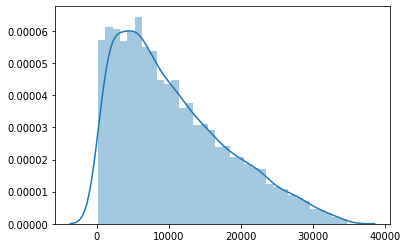

In [31]:
sns.distplot(data[['sum']])

 Если возьмем теперь построим модель на основе нового признака и целевой переменной, то ошика МАЕ будет близка к 0, что говорит о хорошей прогнозируемости модели и линейной зависимости.

In [32]:
Xfin = data[['sum']]
y = data['salary']
model_fin = LinearRegression()
model_fin.fit(Xfin, y)
print(f'Coef: {model_fin.coef_}')
print(f'Intercept: {model_fin.intercept_}')

prediction_fin = model_fin.predict(Xfin)
print(f'MAE: {mean_absolute_error(prediction_fin, y)}')

Coef: [10.]
Intercept: 1892.6327617053903
MAE: 2.8007889341097327e-11


In [33]:
data[['sum', 'salary']].corr()

,sum,salary
sum,1.0,1.0
salary,1.0,1.0


Если в модель добавить дополнительно все признаки, то видим, что качество улучшилось (МАЕ снизилось)

In [34]:
Xfin = data[['age', 'quantity', 'price', 'sum']]
y = data['salary']
model_fin = LinearRegression()
model_fin.fit(Xfin, y)
print(f'Coef: {model_fin.coef_}')
print(f'Intercept: {model_fin.intercept_}')

prediction_fin = model_fin.predict(Xfin)
print(f'MAE: {mean_absolute_error(prediction_fin, y)}')

Coef: [-5.45148227e-14 -5.01707967e-12 -4.66800152e-14  1.00000000e+01]
Intercept: 1892.6327617054485
MAE: 1.8953596736537293e-11


Если обратить внимание на коэффициенты признаков, то можно заметить, что они близки к нулю, что говорит об их низком влиянии на предсказательную способность модели